In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Shaha\AppData\Local\Temp\ipykernel_37512\3184229241.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<AxesSubplot: >

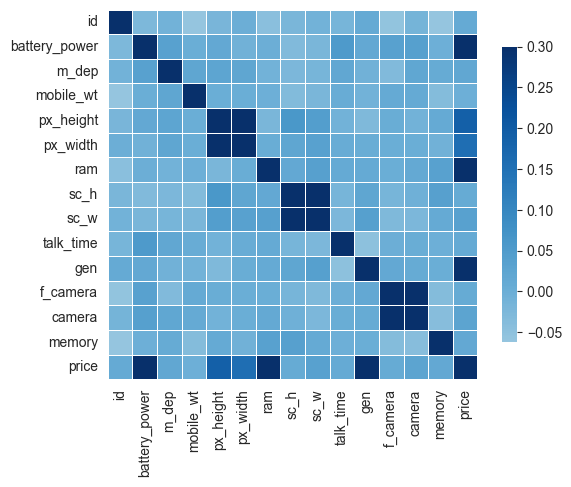

In [91]:
df = pd.read_csv('mobile_price_1.csv')
corr = df.corr()
sns.heatmap(corr,xticklabels = corr.columns, yticklabels = corr.columns, cmap="Blues", vmax=0.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .8})

ex 2)
the features that are best correlated with the price are:
1) battery power
2) screen resolution (px_height / px_width)
3) ram
4) core generation

ex 3)
there are multiple features that are string that can have a strong correlation tact aren't shown like:
1) cores
2) speed
3) numer of sims
4) screen type
5) wifi
6) bluetooth

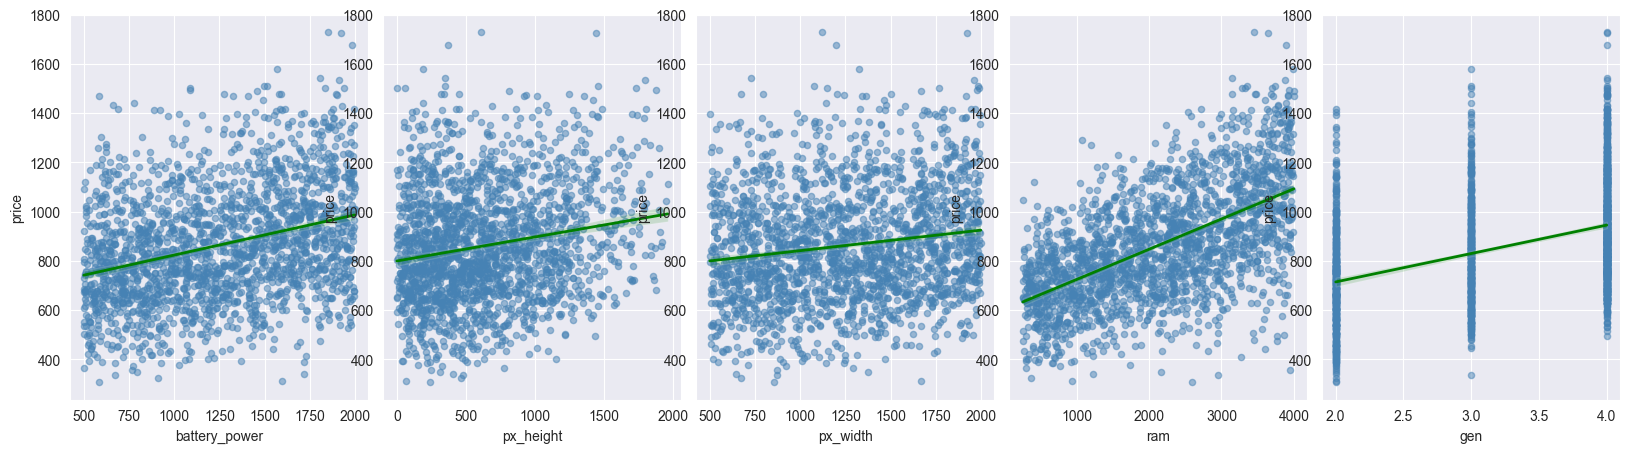

In [92]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 5))
features = ['battery_power','px_height', 'px_width', 'ram', 'gen']
for ax, feature in zip(axes.flatten(), features):
    sns.regplot(data=df, x=feature, y='price', ax=ax,scatter_kws={'s':20, 'alpha':0.5, 'color':'SteelBlue'}, line_kws={'color':'green', 'lw':2})

plt.subplots_adjust(wspace=.05, hspace=0)
plt.show()

task 2)

In [93]:
ordinal_features = ['gen', 'cores', 'speed']
nominal_features = ['bluetooth', 'sim', 'screen', 'wifi']

for feature in ordinal_features:
    df[feature + '_ord'] = pd.Categorical(df[feature],ordered=True)

print(df)

        id  battery_power  m_dep  mobile_wt  px_height  px_width   ram  sc_h  \
0        0            842    0.6        188         20       756  2549     9   
1        1           1021    0.7        136        905      1988  2631    17   
2        2            563    0.9        145       1263      1716  2603    11   
3        3            615    0.8        131       1216      1786  2769    16   
4        4           1821    0.6        141       1208      1212  1411     8   
...    ...            ...    ...        ...        ...       ...   ...   ...   
1995  1995            794    0.8        106       1222      1890   668    13   
1996  1996           1965    0.2        187        915      1965  2032    11   
1997  1997           1911    0.7        108        868      1632  3057     9   
1998  1998           1512    0.1        145        336       670   869    18   
1999  1999            510    0.9        168        483       754  3919    19   

      sc_w  talk_time  ...     sim  f_c

In [94]:
for feature in nominal_features:
    one_hot = pd.get_dummies(df[feature], prefix=feature)
    df = pd.concat([df, one_hot], axis=1)
    df[feature+'_bin'] = df[feature].apply(lambda x: 1 if x=='Yes' else 0)
print(df)

        id  battery_power  m_dep  mobile_wt  px_height  px_width   ram  sc_h  \
0        0            842    0.6        188         20       756  2549     9   
1        1           1021    0.7        136        905      1988  2631    17   
2        2            563    0.9        145       1263      1716  2603    11   
3        3            615    0.8        131       1216      1786  2769    16   
4        4           1821    0.6        141       1208      1212  1411     8   
...    ...            ...    ...        ...        ...       ...   ...   ...   
1995  1995            794    0.8        106       1222      1890   668    13   
1996  1996           1965    0.2        187        915      1965  2032    11   
1997  1997           1911    0.7        108        868      1632  3057     9   
1998  1998           1512    0.1        145        336       670   869    18   
1999  1999            510    0.9        168        483       754  3919    19   

      sc_w  talk_time  ... sim_bin  scr

C:\Users\Shaha\AppData\Local\Temp\ipykernel_37512\3515094215.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()
C:\Users\Shaha\AppData\Local\Temp\ipykernel_37512\3515094215.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


<AxesSubplot: >

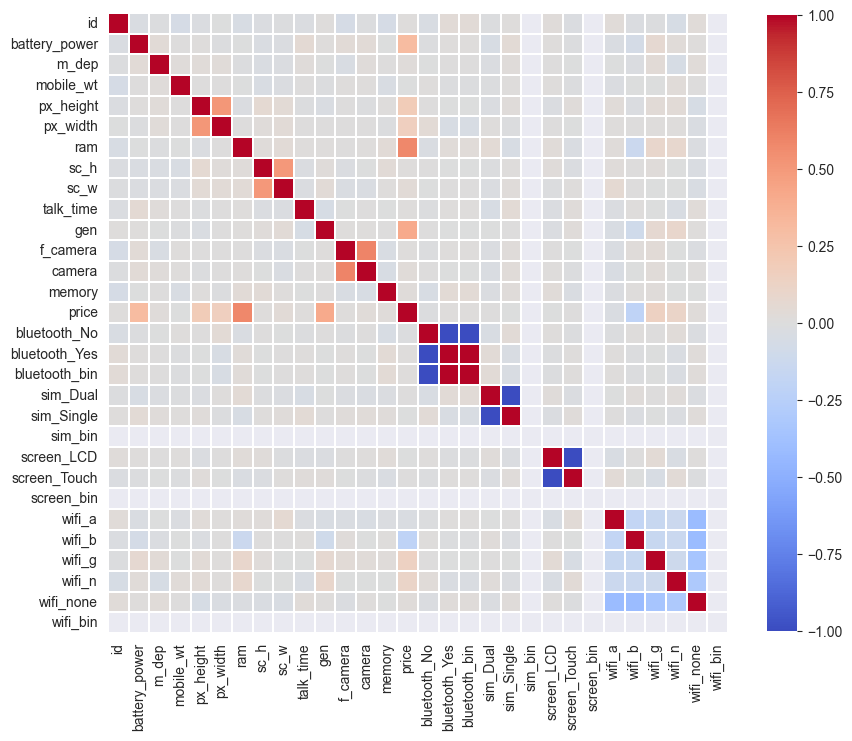

In [95]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
plt.figure(figsize=(10, 10))
sns.heatmap(corr,xticklabels = corr.columns, yticklabels = corr.columns, cmap="coolwarm",vmax=1 ,center=0,
            square=True, linewidths=.3, cbar_kws={"shrink": .8})

In [96]:
df.to_csv('mobile_prices_converted.csv', index=False)

Task 3)